# Plotly

https://plotly.com/python

![image.png](attachment:9b88fdf3-295b-423c-a205-f48e7762b874.png)

In [1]:
!pip install plotly
!pip install dash
!pip install wordcloud
!pip install cufflinks
!pip install missingno

     ---------------------------------------- 10.2/10.2 MB 3.4 MB/s eta 0:00:00
     ------------------------------------ 152.1/152.1 kB 121.0 kB/s eta 0:00:00
     -------------------------------------- 81.7/81.7 kB 656.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=67295e00856f5380415dc2d5d591c66694bb623de6163a4696eacddaa84feade
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b1\8f\ec\b76ac80a14f3f5f59643cbc2eee7d78690b1bd158279f299dd
Successfully built cufflinks


In [2]:
from plotly.offline import init_notebook_mode, iplot, plot

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# plotly
import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor,

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

## warnings
#import warnings
#warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot

**import os** modülü, bir dizi işletim sistemiyle ilgili işlemleri gerçekleştirmek için kullanışlı işlevlere sahiptir. Örneğin, dosya ve dizinleri yönetmek, işletim sistemiyle etkileşimde bulunmak, sistemle ilgili bilgileri almak veya ayarlamak gibi işlemleri yapabilirsiniz.


In [ ]:
# birçok istatistiksel,finansal vb 3 boyutlu görsel grafik çiziyor

# Submodules

plotly.express :Plotly Express, high-level interface for data visualization

plotly.graph_objects :Graph Objects, low-level interface to figures, traces and layout

plotly.subplots : Subplots, helper function for layout out multi-plot figures ""

plotly.figure_factory : Figure Factories, helper methods for building specific complex charts ""

plotly.io : I/O, low-level interface for displaying, reading and writing figures

plotly.colors: colorscales and utility functions

plotly.data: built-in datasets for demonstration, educational and test purposes

In [4]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [5]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
timesData.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1914,=110,University of Southampton,United Kingdom,39.8,88.4,43.6,82.0,37.5,57.2,"20,925",13.5,29%,53 : 47,2016
204,5,Princeton University,United States of America,91.5,49.6,99.1,100.0,81.0,92.9,"7,929",8.4,27%,45 : 55,2012
958,351-400,Heriot-Watt University,United Kingdom,20.7,84.2,21.4,42.1,48.4,-,"8,773",17.8,43%,41 : 59,2013
1111,109,University of Alberta,Canada,44.6,70.1,47.8,59.3,46.8,52.0,"36,299",21.6,23%,55 : 45,2014
363,164,Texas A&M University,United States of America,42.3,36.0,51.8,45.7,43.8,45.7,"50,657",21.4,9%,47 : 53,2012
482,276-300,Middle East Technical University,Turkey,37.0,23.5,28.9,35.1,43.2,-,"25,779",22.2,7%,44 : 56,2012
1695,276-300,University of Fribourg,Switzerland,29.2,84.4,19.7,58.6,48.2,-,"10,416",46.9,19%,58 : 42,2015
2525,601-800,Oakland University,United States of America,18.1,23.3,11.9,21.9,30.3,-,"14,584",19.8,2%,60 : 40,2016
1482,81,Free University of Berlin,Germany,49.4,56.6,58.0,67.6,33.5,57.6,"33,062",39.3,20%,58 : 42,2015
777,176,University of Aberdeen,United Kingdom,31.9,84.1,34.3,71.5,48.9,48.8,"12,938",15.8,33%,54 : 46,2013


In [7]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


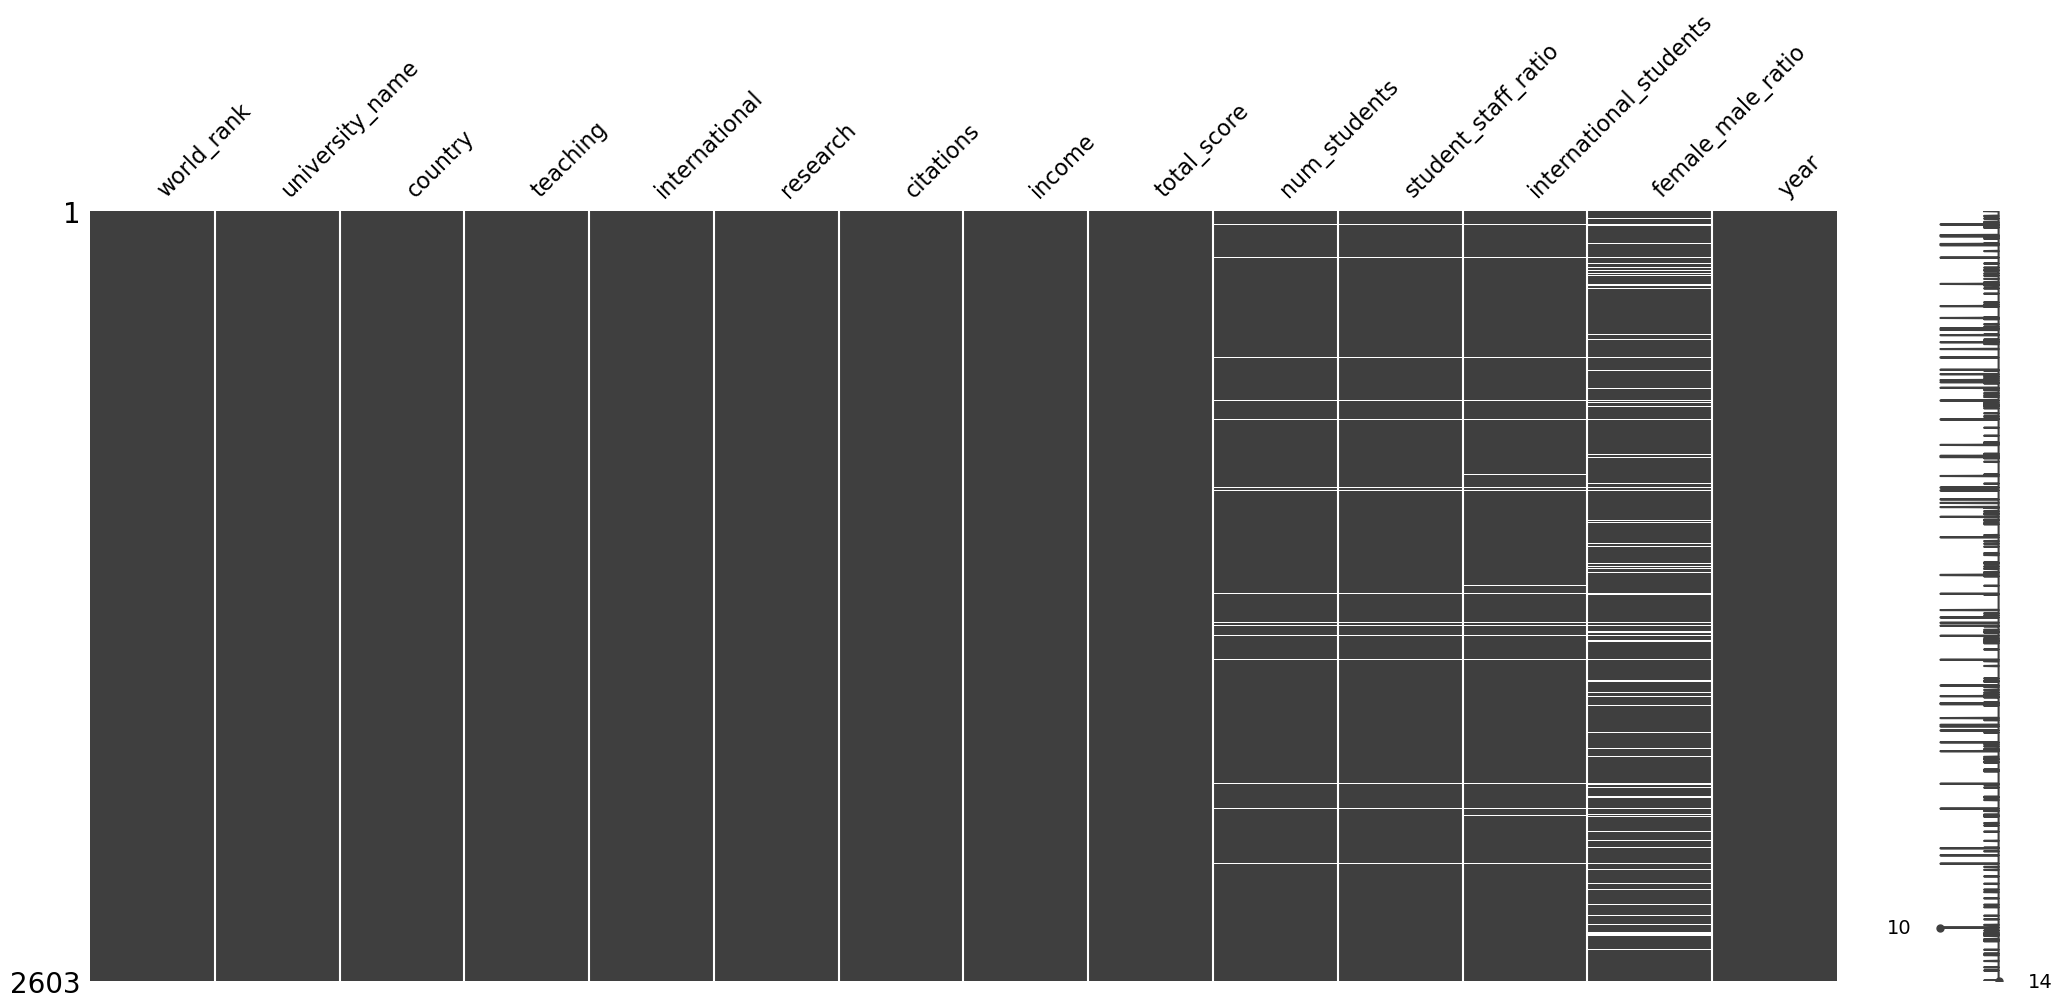

In [8]:
import missingno
missingno.matrix(timesData);

# sağ taraftaki beyaz yerler boş, koyu griler dolu

Bu kod, "missingno" adlı bir Python kütüphanesini kullanarak "timesData" adlı bir veri kümesindeki eksik değerleri görselleştirir.

**"missingno.matrix()" fonksiyonu, bir matris grafiği çizer ve veri kümesindeki eksik değerlerin nerede olduğunu gösterir. Bu grafik, her sütunun altında bir çizgi ile gösterilir ve eksik veriler beyaz bir çizgiyle işaretlenir. Bu sayede veri setindeki eksik verilerin dağılımını kolayca anlayabilirsiniz.

In [9]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [10]:
df = timesData.iloc[:100, :]
df.shape

(100, 14)

**Bu kod, "timesData" adlı bir veri kümesinden ilk 100 satırını "df" adlı bir değişkene atar. "iloc" fonksiyonu, veri kümesindeki satır ve sütunlara integer indeksleri kullanarak erişmenizi sağlar.

**"iloc[:100, :]" ifadesi, veri kümesindeki tüm sütunları seçerken, sadece ilk 100 satırı seçer. "shape" özelliği, "df" veri kümesinin boyutunu (satır ve sütun sayısı) bir tuple olarak döndürür.

In [11]:
import plotly.graph_objs as go

In [14]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


**go.Scatter**, **plotly.graph_objs** modülünde yer alan bir sınıftır ve plotly kütüphanesi aracılığıyla **çizgi grafiği, nokta grafiği, yüzey grafiği, kutu grafiği, çubuk grafiği** vb. gibi birçok görselizasyon türünü oluşturmak için kullanılır.

go.Scatter sınıfı, x ve y eksenleri boyunca verilerin dağılımını görselleştirmek için kullanılan çizgi grafiği özelliklerini belirlemek için kullanılır. x ve y parametreleri, grafiğin x ve y eksenlerinde gösterilecek verileri içerirken, mode parametresi, grafiğin çizim tarzını belirler. name parametresi, grafiğin adını belirlerken, marker parametresi, nokta grafiğinin renk, şekil ve boyut gibi özelliklerini belirler. text parametresi, her noktanın üzerinde görüntülenecek metni belirler.

go.Scatter sınıfı aynı zamanda, birden fazla veri kümesi içeren grafiği oluşturmak için de kullanılabilir. Bu durumda, her veri kümesi ayrı bir go.Scatter nesnesi olarak oluşturulur ve tüm nesneler aynı grafikte görüntülenir.

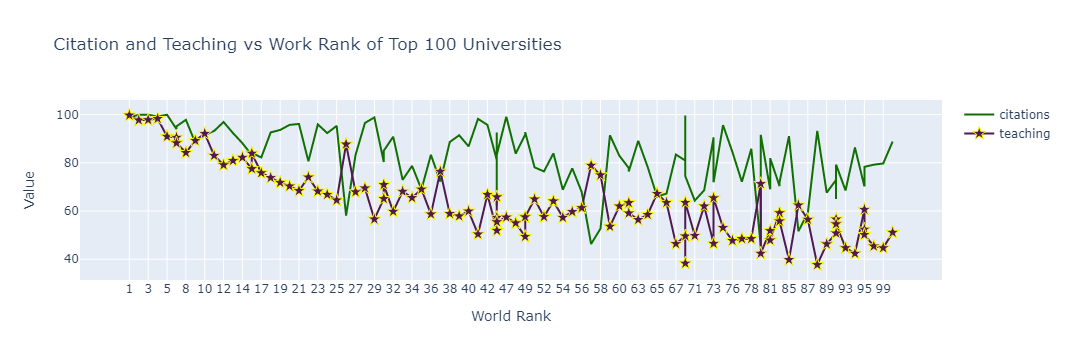

In [15]:
#plt.style.use("ggplot")
# creating trace 1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",  #Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür.
                                     #Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür.
                                     #20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)
data = [trace1, trace2]
layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))
fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.

1) Bu kod **(trace 1)**, plotly kütüphanesinin **graph_objs** modülü kullanılarak bir çizgi grafiği oluşturmak için yazılmıştır. df adında bir veri çerçevesi kullanarak, dünya üniversitelerinin sıralamalarını ve atıflarını karşılaştıran bir grafiği görselleştirmek için kullanılır.  trace= iz

**trace1 = go.Scatter( ** --> **trace1**, çizgi grafiği olarak oluşturulacak veri kümesidir.

**x = df.world_rank** --> **x ekseni**, "world_rank" sütunundan gelen verilerle oluşturulur. Bu, üniversitelerin sıralamasını gösterir.

**y = df.citations** --> **y ekseni**, "citations" sütunundan gelen verilerle oluşturulur. Bu, üniversitelerin atıf sayısını gösterir.

**mode = "lines"**, --> **mode** özelliği, çizgi grafiğinin nasıl çizileceğini belirler. "lines", sadece çizgilerin görüntülenmesini sağlar.

**name = "citations"**, --> **name** özelliği, veri kümesinin adını belirler. Burada, veri kümesi "citations" adını taşır.

**marker = dict(color = "rgb(16, 112, 2)")**, --> **marker** özelliği, çizgi grafiğinde kullanılan noktaların rengini belirler. Burada, noktalar koyu yeşil renkte görüntülenir.

**text = df.university_name)** --> **text** özelliği, her noktanın üzerinde görüntülenecek olan metni belirler. Burada, her noktanın üniversitenin adını içermesi için "university_name" sütunundan veriler kullanılır.

Kod, bu şekilde çalıştırıldığında, **trace1** değişkeni çizgi grafiğini oluşturmak için kullanılabilir. Bu grafiği daha sonra plotly kütüphanesinin diğer işlevleri kullanarak görselleştirebilirsiniz.

2) Bu kod **(trace 2)**, plotly kütüphanesinin graph_objs modülü kullanılarak bir çizgi grafiği oluşturmak için yazılmıştır. Ayrıca, df adlı bir veri çerçevesi kullanarak, üniversitelerin sıralamaları ile öğretim puanlarını karşılaştıran bir grafiği görselleştirmek için kullanılır.

**trace2 = go.Scatter(** --> **trace2**, çizgi grafiği olarak oluşturulacak ikinci veri kümesidir.

**x = df.world_rank** --> **x ekseni**, "world_rank" sütunundan gelen verilerle oluşturulur. Bu, üniversitelerin sıralamasını gösterir.

**y = df.teaching** --> **y ekseni**, "teaching" sütunundan gelen verilerle oluşturulur. Bu, üniversitelerin öğretim kalitesini gösterir.

**mode = "lines + markers"** -->  **mode** özelliği, çizgi grafiğinin nasıl çizileceğini belirler. Burada, hem çizgilerin hem de noktaların görüntülenmesi istenir.

**name = "teaching"** --> **name** özelliği, veri kümesinin adını belirler. Burada, veri kümesi "teaching" adını taşır.

**marker = dict(color = "rgb(80,26,80)",
              size = 10,
              symbol = "star",
              line = dict(
                     color = "yellow",
                     width = 1),)**,
 --> **marker** özelliği, çizgi grafiğinde kullanılan noktaların rengini, boyutunu, şeklini ve kenarlık özelliklerini belirler. Burada, noktalar mor renkte "yıldız" şeklinde görüntülenir ve bir sarı kenarlıkla çevrilidir.
 
**text = df.university_name)** --> **text** özelliği, her noktanın üzerinde görüntülenecek olan metni belirler. Burada, her noktanın üniversitenin adını içermesi için "university_name" sütunundan veriler kullanılır.

Kod, bu şekilde çalıştırıldığında, trace2 değişkeni çizgi grafiğini oluşturmak için kullanılabilir. Bu grafiği daha sonra plotly kütüphanesinin diğer işlevleri kullanarak görselleştirebilirsiniz.

3) Bu kod, **trace1** ve **trace2** adlı iki adet **go.Scatter** nesnesi oluşturur. Her bir nesne, farklı bir veri kümesini içerir ve her veri kümesi ayrı bir çizgi grafiği olarak gösterilir.

Daha sonra, **layout** adlı bir sözlük oluşturulur. Bu sözlük, grafiğin çeşitli görsel özelliklerini belirler. title parametresi,grafiğin başlığını belirlerken, xaxis ve yaxis parametreleri, x ve y eksenlerinin özelliklerini belirler. Burada, eksenlerin başlıkları (title) belirlenirken, **ticklen parametresi**, **eksen çizgilerinin boyutunu belirlerken**, tickcolor parametresi ise eksen çizgilerinin rengini belirler. **zeroline** parametresi ise **eksenin sıfır noktasının gösterilip gösterilmeyeceğini** belirler.

Son olarak, data ve layout parametreleri birleştirilerek fig adlı bir sözlük oluşturulur ve iplot fonksiyonu kullanılarak grafiğin çizdirilmesi sağlanır.

Bu kodun amacı, Citation ve Teaching değerlerinin Dünya Sıralaması (World Rank) ile olan ilişkisini görselleştirmektir. Grafiğin başlığı "Citation and Teaching vs Work Rank of Top 100 Universities" olarak belirlenmiştir ve x ekseninde Dünya Sıralaması, y ekseninde ise Citation ve Teaching değerleri gösterilmektedir. Eksenlerin çizgileri kırmızı renkte belirtilmiştir ve sıfır noktası gösterilmemiştir.

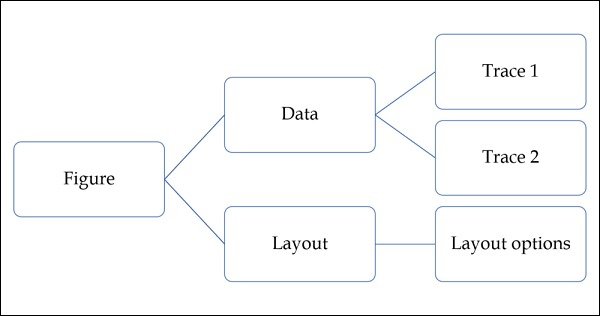

-Bu görsel plotly de figure şemasını gösterir

## Zero Kullanımı

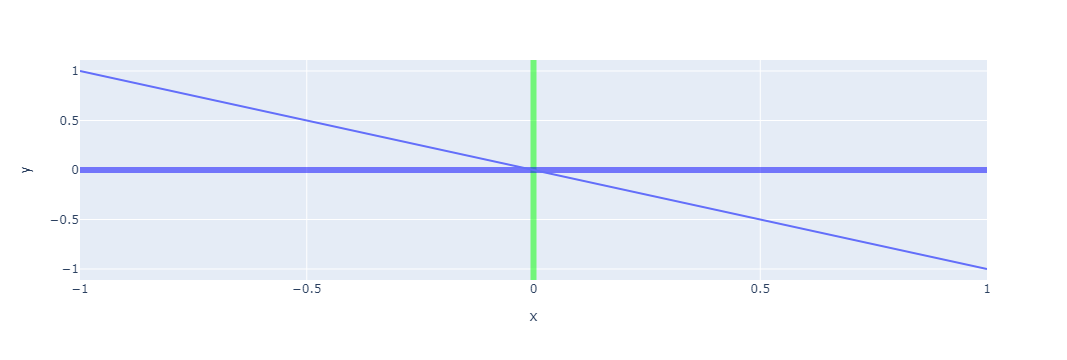

In [17]:
fig = px.line(y=[1, -1], x=[-1,1]) # orijonden gecen dogru

fig.update_xaxes(zeroline=True,zerolinewidth=6, zerolinecolor='rgba(0,255,0,0.5)') # yesil rengi veren
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(0,0,255,0.5)')

fig.show()

**fig = px.line(y=[1, -1], x=[-1,1])** kodu, px.line fonksiyonunu kullanarak bir çizgi grafiği oluşturur. px.line fonksiyonu, Plotly Express kütüphanesinin bir parçasıdır ve çizgi grafikleri oluşturmak için kullanılır.

**import plotly.express as px** modülü ile kullanılır. Bu modül, grafik oluşturma işlemlerini kolaylaştıran bir arayüz sağlar.

Bu kod, y=[1, -1] ve x=[-1, 1] verilerine sahip bir çizgi grafiği oluşturur. Y ekseninde 1 ve -1 değerlerini, X ekseninde ise -1 ve 1 değerlerini temsil eden bir çizgi grafiği çizilir.

Oluşturulan fig nesnesi, daha sonra çizgi grafiğini görselleştirmek veya başka değişiklikler yapmak için kullanılabilir. Örneğin, **fig.show()** yöntemi çağrılarak grafiği görüntüleyebilirsiniz.

- zeroline=False

-zeroline=True -- > "0" çizgisi

## Ticklen Kullanımı

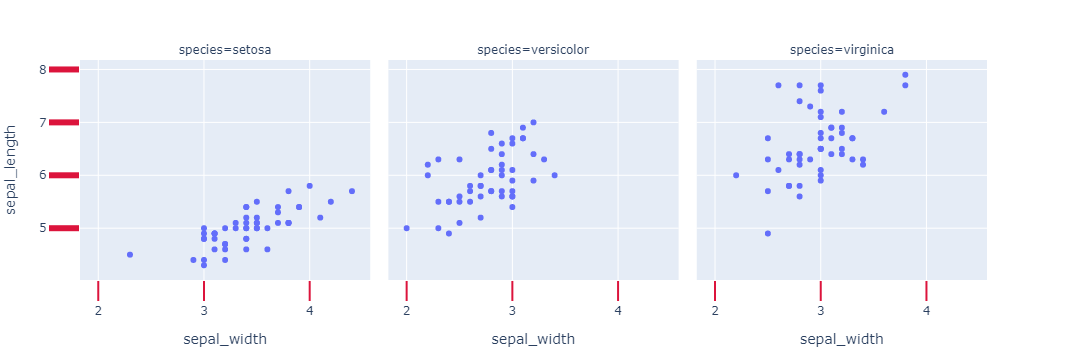

In [19]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=6, tickcolor='crimson', ticklen=30, col=1)


fig.show()

Bu kod, iris veri kümesini **(px.data.iris())** yükleyerek, sepal_width (çanak yaprağı genişliği) ve sepal_length (çanak yaprağı uzunluğu) değişkenlerini kullanarak bir scatter plot (nokta grafiği) çizdirir. Ayrıca, her bir çiçek türü için ayrı bir grafik oluşturmak için facet_col="species" parametresi kullanılır.

Daha sonra, fig.update_xaxes ve fig.update_yaxes komutlarıyla x ve y eksenlerinin çizgileri belirlenir. ticks parametresi, çizgilerin hangi yönde olacağını belirlerken, tickwidth parametresi çizgilerin kalınlığını belirler. tickcolor parametresi çizgilerin rengini belirlerken, ticklen parametresi çizgilerin uzunluğunu belirler.

Son olarak, fig.show() komutu kullanılarak grafiğin çizdirilmesi sağlanır.

Bu kodun amacı, sepal_width ve sepal_length değişkenlerinin iris çiçeği türlerine göre nasıl değiştiğini görselleştirmektir. Facet özelliği sayesinde her bir çiçek türü ayrı bir grafik olarak gösterilir. Eksenlerin çizgileri kırmızı renkte belirtilmiştir ve x ekseninin çizgileri daha uzun, y ekseninin çizgileri ise daha kısadır.

Iris veri kümesi, çiçek türlerinin özelliklerinin sınıflandırılması için kullanılan bir veri kümesidir. Bu veri kümesi, ünlü istatistikçi ve bitki bilimci Ronald Fisher tarafından 1936 yılında yayınlanan bir makalede tanıtılmıştır ve o zamandan beri sık sık kullanılan bir veri kümesi olmuştur.

Iris veri kümesi, üç farklı iris çiçeği türünün özelliklerini içerir: setosa, versicolor ve virginica. Her bir çiçeğin çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliği gibi özellikleri ölçülmüştür. Bu özellikler, çiçek türlerinin doğru şekilde sınıflandırılmasına yardımcı olacak şekilde seçilmiştir.

Iris veri kümesi, özellikle sınıflandırma algoritmalarının ve makine öğrenmesi algoritmalarının eğitiminde kullanılan bir veri kümesidir. Ayrıca, veri görselleştirme ve istatistiksel analiz amaçları için de sık sık kullanılmaktadır.

In [24]:
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


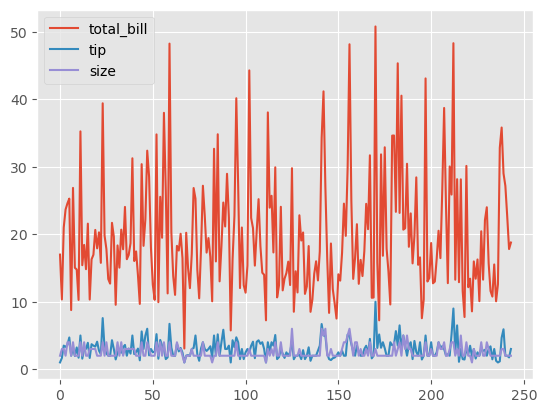

In [25]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.plot();

-ggplot2 is an open-source data visualization package for the statistical programming language R.

**plt.style.use('ggplot')** kodu, matplotlib kütüphanesinde grafiklerin görünümünü değiştirmek için kullanılan bir stil şablonunu belirler.

**import matplotlib.pyplot as plt** modülü plt takma adıyla içe aktarılır. 

Bu kod, "ggplot" stili kullanılarak dataset2 veri setindeki "total_bill", "tip" ve "size" sütunlarını içeren bir çizgi grafiği oluşturur.

-üstteki grafiği aşağıda iplot ile çizfiriyorum

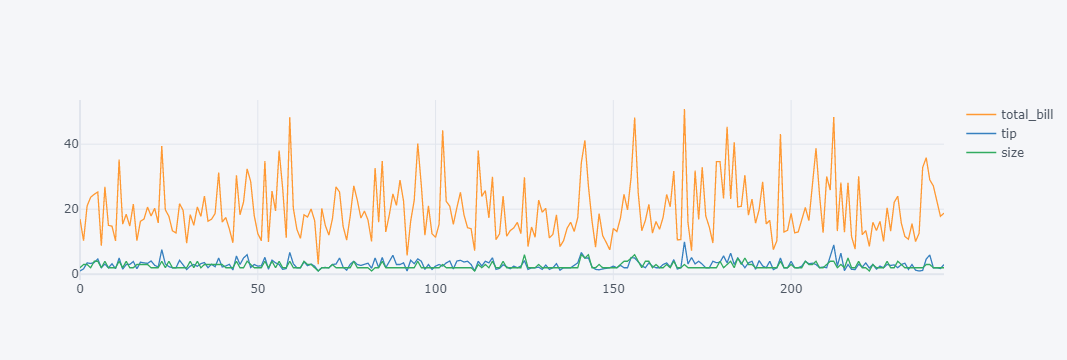

In [27]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.iplot();

Bu kodda, "ggplot" stili kullanılarak dataset2 veri setindeki "total_bill", "tip" ve "size" sütunlarından oluşan bir interaktif çizgi grafiği oluşturulur ve görselleştirilir.

İlk satırda, **plt.style.use()** fonksiyonu kullanılarak "ggplot" stili belirlenir. Bu stil, grafiklerin görünümünü "ggplot" stil şablonuna göre ayarlar.

İkinci satırda, **dataset2** adlı bir DataFrame oluşturulur. Bu DataFrame, "dataset" adlı başka bir DataFrame'den "total_bill", "tip" ve "size" sütunlarını seçerek oluşturulur.

Üçüncü satırda, **dataset2.iplot()** çağrısıyla interaktif bir çizgi grafiği oluşturulur. **iplot()** fonksiyonu, DataFrame üzerinde interaktif grafikler oluşturmak için kullanılan **Plotly kütüphanesine** aittir. Bu şekilde oluşturulan grafik, daha zengin etkileşimli özelliklere sahip olabilir ve çizgi grafiğini görselleştirmek için interaktif bir arayüz sağlayabilir.

In [27]:
df.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


In [28]:
# prepare data drames

df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

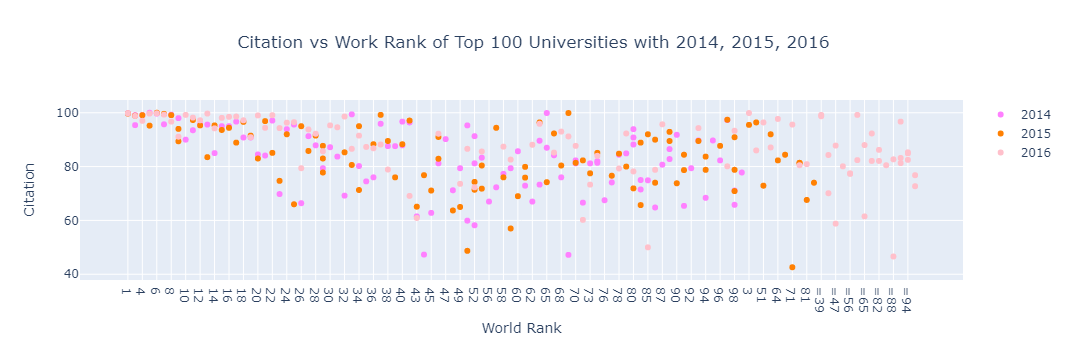

In [29]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "pink"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))
fig = dict(data = data, layout = layout)
iplot(fig)

**title_x** ve **title_y** anahtarları, **başlığın yatay (x) ve dikey (y) konumunu belirler**. Bu değerler 0 ile 1 arasında bir nokta olarak belirtilir. Burada title_x=0.5 ve title_y=0.9 değerleri, başlığın yatayda ortalanmış ve dikeyde üst tarafta yer almasını sağlar.

## Bar Charts
seaborn da olduğu gibi plotlyde de içine embed (gömülü) veri setleri var. 

Bunlardan çalışalım biraz, ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.

data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/

Datamız yıllara sari olarak ülke bilgilerini içeriyor

LifeExp=Ortalama Ömür

pop = populasyon

gdpPercap = kişi başı gelir yıllık yada kişi alım gücü

iso_num = ülkenin numarası

In [34]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


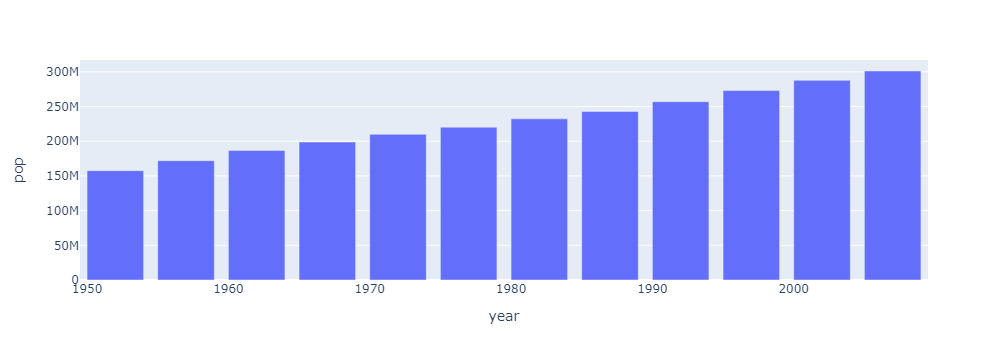

In [37]:
gm_usa = px.data.gapminder().query("country =='United States'")
px.bar(gm_usa, x = "year", y = "pop")

Bu kod, "gapminder" veri setinden "United States" (Amerika Birleşik Devletleri) ülkesine ait verileri filtrelemek için **query()** fonksiyonunu kullanır ve ardından **px.bar()** fonksiyonunu kullanarak yıl ("year") ve nüfus ("pop") verilerini içeren bir sütun grafiği oluşturur.



**query()** fonksiyonu, DataFrame üzerinde filtreleme yapmak için kullanılan bir pandas metodudur. Bu metod, belirli bir koşula uyan satırları seçmek için kullanılır.

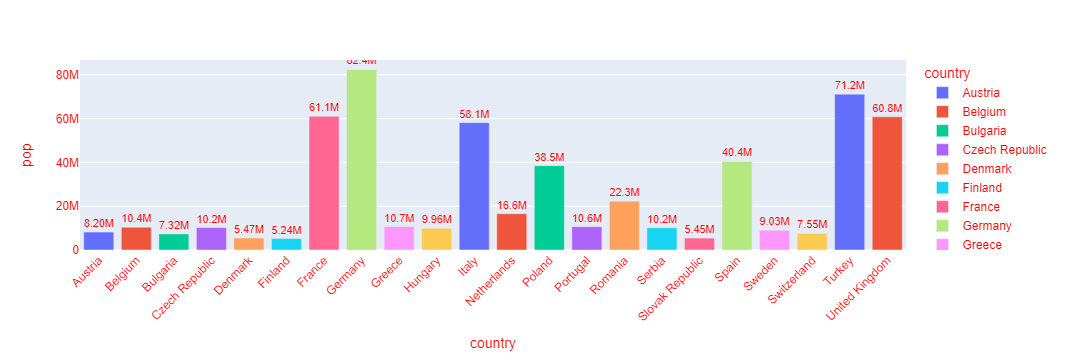

In [7]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" ) #e6=10^6 
fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")

fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor
fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)

**df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )
fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")**

Bu kod, "gapminder" veri setini kullanarak filtreleme yaparak Avrupa kıtasındaki 2007 yılında nüfusu 5 milyonun üzerinde olan ülkeleri içeren bir çubuk grafik (bar chart) oluşturur.

İlk satırda, px.data.gapminder() işlevi kullanılarak "gapminder" veri seti yüklenir. Ardından, query() fonksiyonu kullanılarak filtreleme işlemi yapılır. "continent" sütunu "Europe" (Avrupa) değerine eşit, "year" sütunu 2007 değerine eşit ve "pop" sütunu 5 milyonun üzerinde olan verileri filtreler. Bu filtreleme sonucunda, df_europe adında bir DataFrame oluşturulur.

İkinci satırda, **px.bar()** fonksiyonu çağrılarak **çubuk grafik** oluşturulur. df_europe DataFrame'i, "pop" sütununu y ekseni olarak, "country" sütununu x ekseni olarak, **"pop"** sütununu ise **çubukların üzerine yazdırılacak metin** olarak belirtilir. Ayrıca, her bir ülkeyi temsil eden çubukların rengi "country" sütununa göre belirlenir.

**fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12)**

Bu kod, fig adlı bir grafik nesnesinin **update_traces()** yöntemini kullanarak **çubuk grafikteki metin özelliklerini** günceller. **textposition, texttemplate ve textfont_size** parametreleri kullanılarak **metin pozisyonu, metin formatı ve metin font büyüklüğü** ayarlanır.

**update_traces()** yöntemi, çubuk grafikteki her bir çubuk için özellikleri güncellemek için kullanılır.

**textposition="outside"** ifadesi, **çubukların dışında metnin yerleştirilmesini** belirtir. Bu, çubukların üzerinde değil, çubukların dışında metnin görüntüleneceği anlamına gelir.

**texttemplate="%{text:.3s}"** ifadesi, **metnin nasıl biçimlendirileceğini** belirtir. **%{text}** kısmı, **metnin çubukların üzerine yerleştirilecek değeri** temsil eder. .**3s** kısmı, **metni üç karaktere kadar olan bir string** olarak biçimlendirir. Bu şekilde, metin üzerinde yalnızca ilk üç karakter görüntülenir.

**textfont_size=12** ifadesi, **metin font büyüklüğünü 12** olarak ayarlar. Bu, metnin görüntülenen yazı tipi boyutunu belirler.

Özetle,bu kodu kullanarak, çubuk grafikteki metin özelliklerini güncelleyebilirsiniz. Metni çubukların dışına yerleştirir, üç karaktere kadar olan bir string olarak biçimlendirir ve font büyüklüğünü ayarlar.



**fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)**
Bu kod, fig adlı grafik nesnesinin update_layout() yöntemini kullanarak grafiğin düzenini ve metin özelliklerini günceller.

**xaxis_tickangle=-45** ifadesi, **x ekseni üzerindeki etiketlerin 45 derece açıyla çizilmesini** sağlar. Bu, etiketlerin eğik bir şekilde görüntülenmesini sağlar ve okunabilirliği artırır. **-45** değeri, **etiketlerin saat yönünün tersine** dönük olarak eğik olarak çizileceğini belirtir.

**font_family="Arial"** ifadesi, **grafiğin metinlerinin "Arial" yazı tipini** kullanmasını sağlar. Metinler, grafik başlıkları, eksen etiketleri ve diğer metin bileşenleri için geçerlidir.

**font_color="red"** ifadesi, **grafiğin metinlerinin "red" (kırmızı)** renkte görüntülenmesini sağlar. Bu, metinlerin kırmızı renkte olacağı anlamına gelir.

**font_size=12** ifadesi, **grafiğin metinlerinin font büyüklüğünü 12** olarak ayarlar. Bu, metinlerin 12 punto büyüklüğünde görüntüleneceği anlamına gelir.

Özetle, bu kodu kullanarak, grafiğin x ekseni etiketlerinin eğik bir şekilde (-45 derece açıyla) çizilmesini, metinlerin "Arial" yazı tipini kullanmasını, kırmızı renkte görüntülenmesini ve 12 punto büyüklüğünde olmasını sağlayabilirsiniz.


textposition = "outside" -- > ülkelerin isimlerini text dışına alıyorum

texttemplate = "%{text:.3s}" -- > bar üz. rakamlar

xaxis_tickangle = -45 --> ülkelerin text dışındaki isimlerinin açısı

## Pie Chart

In [40]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

df = df2016.num_students
df.count()

7

In [45]:
df2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016


In [46]:
df1 = (df.str.replace(",", "")).astype("float")
df1

1803     2243.0
1804    19919.0
1805    15596.0
1806    18812.0
1807    11074.0
1808    20152.0
1809     7929.0
Name: num_students, dtype: float64

Bu kod, bir DataFrame üzerinde işlem yaparak virgülle ayrılmış değerleri içeren sütunları temizler ve bu değerleri ondalık sayılara dönüştürür.

**df.str.replace(",", "")** ifadesi, DataFrame'deki sütunlardaki virgüllerin yerine boşluk karakterini koyarak virgüllerin kaldırılmasını sağlar. Bu adım, özellikle sayısal değerlerde virgül yerine nokta kullanıldığı durumlarda, sayıları doğru şekilde işlemek için gereklidir.

**astype("float")** ifadesi, sütunların veri türünü ondalık sayılara (float) dönüştürür. Bu, sayısal işlemler yapabilmek ve sayıları doğru şekilde temsil etmek için önemlidir.


In [47]:
df2 = list((df.str.replace(",", "")).astype("float"))
df2

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [33]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

Bu kod, df2016 adlı DataFrame içerisindeki "num_students" sütununda bulunan değerleri virgül ile ayrılmış olarak alır, virgülleri kaldırır ve her bir değeri ondalık sayıya dönüştürerek pie_list adında bir liste oluşturur.

**for each in df2016.num_students** ifadesi, df2016 DataFrame'inin "num_students" sütunundaki her bir değeri döngüyle alır.

**each.replace(",", "")** ifadesi, her bir değerdeki virgülleri kaldırır. Bu, sayısal değerlerde virgül yerine nokta kullanıldığı durumlarda doğru sayıları elde etmek için önemlidir.

**float(...)** ifadesi, her bir değeri ondalık sayıya (float) dönüştürür.

**[...]** ifadesi, döngü sonucunda elde edilen her bir ondalık sayıyı pie_list adında bir liste içerisine ekler.

Sonuç olarak, bu kod, df2016 DataFrame'indeki "num_students" sütunundaki değerleri virgüllerden temizleyip ondalık sayılara dönüştürerek pie_list adında bir liste oluşturur. Bu liste, virgüllerden arındırılmış ve sayısal verilerin olduğu bir veri yapısıdır ve daha sonra farklı analiz veya görselleştirme işlemlerinde kullanılabilir.

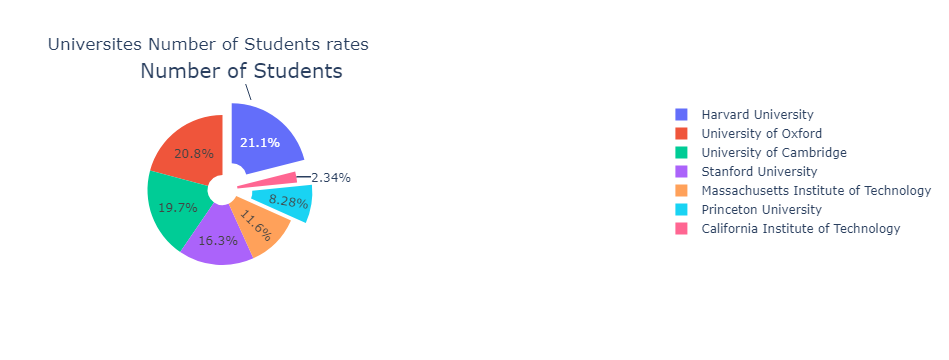

In [34]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]},
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

**"data"** anahtarı altında, bir liste içinde tek bir pasta grafiği verisi tanımlanır.

**"values"** anahtarı, pasta dilimlerinin değerlerini içeren "pie_list" adlı listeyle ilişkilendirilir. Bu değerler, dilimlerin büyüklüğünü temsil eder.

**"labels"** anahtarı, pasta dilimlerinin etiketlerini içeren bir listeyle ilişkilendirilir. Bu etiketler, dilimlere ilişkin açıklamaları sağlar.

**"domain"** anahtarı, pasta grafiğinin x eksenindeki alana yayılmasını belirler. Bu örnekte, grafiğin [0, .5] aralığındaki x eksenini kaplaması belirtilir.

**"name"** anahtarı, pasta grafiğinin adını belirtir. Bu ad, grafiğin açıklamasında veya etiketlemesinde kullanılabilir.

**"hoverinfo"** anahtarı, fareyle üzerine gelindiğinde pasta dilimleri için görüntülenecek bilgileri belirtir. Burada, "label + percent" değeri, dilim etiketini ve yüzdesini gösterir.

**"hole"** anahtarı, iç boşluğunun büyüklüğünü belirtir. Bu değer 0 ile 1 arasında bir oran olup, 1'e yaklaştıkça iç boşluk azalır.

**"type"** anahtarı, grafiğin türünü "pie" olarak belirtir. Bu, bir pasta grafiği oluşturulmasını sağlar.

**"pull"** anahtarı, pasta dilimlerinin dışarıya doğru çekilmesini sağlar. Burada, her bir dilim için bir pull değeri belirtilir. Bu örnekte, son iki dilim (.2) dışarıya doğru çekilirken diğer dilimler çekilmez.

**"layout"** anahtarı altında, grafiğin düzenlemelerini içeren bir sözlük tanımlanır.

**"title"** anahtarı, grafiğin başlığını belirtir. Bu örnekte, başlık "Universites Number of Students rates" olarak belirtilmiştir.

**"annotations"** anahtarı, grafiğin üzerine yerleştirilecek açıklamaları içeren bir liste tanımlar.
Açıklamalar, sözlük formunda tanımlanır. Bu örnekte, tek bir açıklama bulunmaktadır.

**"font"** anahtarı, açıklama metninin yazı tipi özelliklerini içeren bir sözlüğe sahiptir. Burada, yazı tipi boyutu "size": 20 olarak belirtilmiştir.

**"text"** anahtarı, açıklama metnini belirtir. Bu örnekte, açıklama metni "Number of Students" olarak belirtilmiştir.

**"x" ve "y"** anahtarları, açıklamanın konumunu belirtir. Bu örnekte, açıklama x ekseninde 0.3, y ekseninde 1 pozisyonuna yerleştirilmiştir.

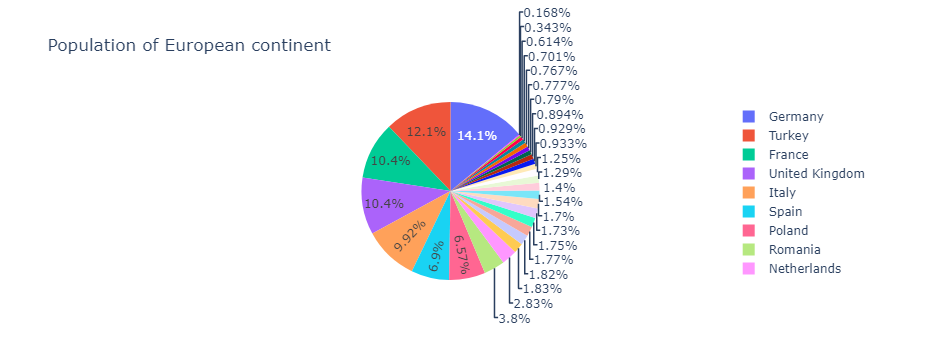

In [35]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

**df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries'**

Bu kod, bir DataFrame olan df içerisinde "pop" sütunu değeri 2 milyon (2e6) üzerinde olmayan satırların "country" sütununu "Other countries" olarak değiştirmeyi amaçlar.

**px.pie()** işlevi, Plotly Express kütüphanesinin bir parçasıdır ve bir pasta grafiği oluşturmayı sağlar.

**df** parametresi, kullanılacak olan DataFrame'i belirtir. Bu örnekte, df DataFrame'i kullanılarak grafiğin oluşturulması hedeflenir.

**values='pop'** ifadesi, pasta grafiğinin dilimlerindeki değerlerin "pop" sütunundan alınacağını belirtir. "pop" sütunu, her bir ülkenin nüfusunu içerir.

**names='country'** ifadesi, pasta grafiğinin dilimlerinin adlarının "country" sütunundan alınacağını belirtir. "country" sütunu, her bir ülkenin adını içerir.

**title='Population of European continent'** ifadesi, grafiğin başlığını belirtir. Bu örnekte, başlık "Population of European continent" olarak belirtilmiştir.

In [52]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.shape

(30, 8)

In [53]:
df = px.data.gapminder().query("year == 2007" and "continent == 'Europe'")
df.shape

(360, 8)

## Bubble Charts

In [8]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

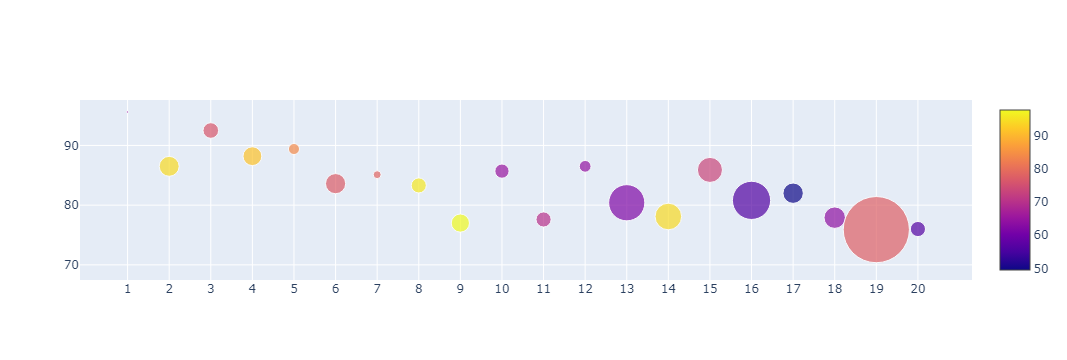

In [9]:
df2016.international
international_color = [float(each) for each in df2016.international]
data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

Bu kod, veri setinde yer alan 2016 yılına ait uluslararası öğretim performansı, dünya sıralaması ve üniversite isimlerini kullanarak bir nokta grafiği (scatter plot) oluşturmayı amaçlar.

**df2016.international** ifadesi, "df2016" DataFrame'inde bulunan "international" sütununu seçer. Bu sütun, uluslararası öğretim performansını temsil eden değerler içerir.

**international_color = [float(each) for each in df2016.international]** ifadesi, "df2016.international" sütunundaki değerleri float veri tipine dönüştürerek "international_color" listesine aktarır. Bu liste, noktaların renklendirilmesinde kullanılacak uluslararası performans değerlerini içerir.

**data** değişkeni, grafiğin verilerini içeren bir liste oluşturur. Bu listede, her bir noktanın x ve y koordinatları, renkleri, boyutları ve metinleri belirtilir.

**"y": df2016.teaching** ifadesi, noktaların y eksenindeki konumunu "teaching" sütunundan alır. Bu sütun, öğretim performansını temsil eden değerleri içerir.

**"x": df2016.world_rank** ifadesi, noktaların x eksenindeki konumunu "world_rank" sütunundan alır. Bu sütun, dünya sıralamasını temsil eden değerleri içerir.

**"mode": "markers"** ifadesi, nokta grafiği (scatter plot) oluşturulacağını belirtir.

**"marker"** sözlüğü, noktaların özelliklerini belirtir. "color" özelliği, noktaların renklerini "international_color" listesinden alır. "size" özelliği, noktaların boyutlarını temsil eder. **"showscale"** özelliği, renk skalasının gösterilip gösterilmeyeceğini belirtir.

**"text": df2016.university_name** ifadesi, her noktanın üzerinde gösterilecek metni "university_name" sütunundan alır. Bu sütun, üniversite isimlerini içerir.

**iplot(data)** ifadesi, Plotly kütüphanesinin iplot işlevini kullanarak verilen veriyle birlikte nokta grafiğini oluşturur ve gösterir.

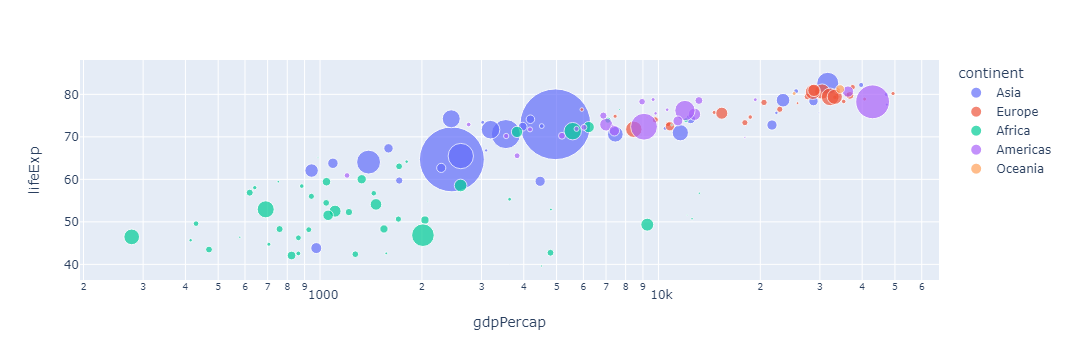

In [30]:
df = px.data.gapminder() #Gapminder, birden çok kaynaktan gelen verileri, başka yerde bulunamayan benzersiz tutarlı zaman serilerinde birleştirir .
fig = px.scatter(df.query("year==2007"), x = "gdpPercap", y = "lifeExp",
                size = "pop", color = "continent",
                 hover_name = "country", log_x = True, size_max = 50)
fig

Bu kod, "gapminder" veri setindeki 2007 yılına ait verileri kullanarak bir nokta grafiği (scatter plot) oluşturmayı amaçlar.

**px.data.gapminder()** ifadesi, Plotly Express kütüphanesinin bir parçası olan "gapminder" veri setini yükler. Bu veri seti, dünya ülkelerine ait bazı sosyoekonomik verileri içerir.

**df.query("year==2007")** ifadesi, "df" DataFrame'indeki verileri filtreler ve sadece 2007 yılına ait verileri seçer.

**x="gdpPercap", y="lifeExp", size="pop", color="continent", hover_name="country", log_x=True, size_max=50** ifadeleri, grafiğin gösterimini ayarlar:

**x="gdpPercap"** ifadesi, **x eksenindeki** verilerin **"gdpPercap"** sütunundan alınacağını belirtir. Bu sütun, kişi başına düşen gayri safi yurtiçi hasıla (GDP) verilerini içerir.

**y="lifeExp"** ifadesi, **y eksenindeki** verilerin **"lifeExp"** sütunundan alınacağını belirtir. Bu sütun, yaşam beklentisini temsil eden verileri içerir.

**size="pop"** ifadesi, noktaların boyutlarının **"pop"** sütunundaki değerlerden alınacağını belirtir. Bu sütun, ülkelerin nüfusunu içerir.

**color="continent"** ifadesi, noktaların renklerinin "continent" sütunundaki değerlerden alınacağını belirtir. Bu sütun, kıtalara göre ülkeleri gruplar.

**hover_name="country"** ifadesi, **noktaların üzerine gelindiğinde görüntülenecek metnin "country" sütunundaki** değerlerden alınacağını belirtir. Bu sütun, ülkelerin isimlerini içerir.

**log_x=True** ifadesi, **x ekseninin logaritmik ölçekte** gösterileceğini belirtir. Bu, verilerin geniş bir aralığa sahip olduğu durumlarda daha iyi bir görselleştirme sağlar.

**size_max=50** ifadesi, noktaların maksimum boyutunu belirtir.

**fig** değişkeni, oluşturulan scatter plot grafiğini temsil eder.

fig ifadesi, grafiği görüntüler.


In [10]:
timesData.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


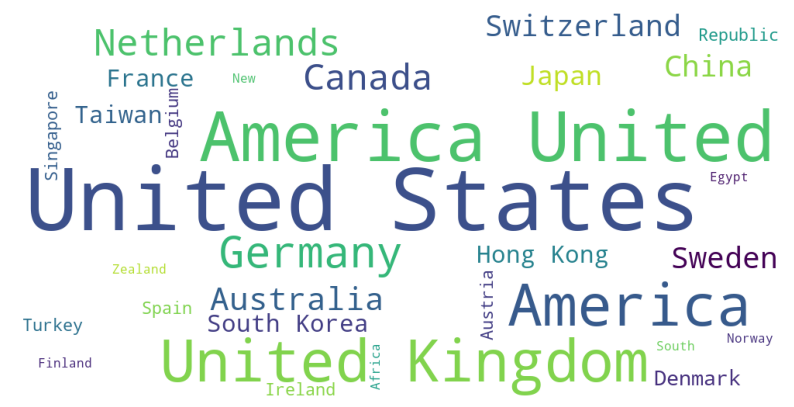

In [32]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (10, 10))
wordcloud = WordCloud(background_color= "white",
                      width = 1000,
                      height= 500).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer
plt.show()

Bu kod, "timesData" veri setindeki 2011 yılına ait ülkelerin adlarını kullanarak bir kelime bulutu (word cloud) oluşturmayı amaçlar.

**x2011 = timesData.country[timesData.year == 2011]** ifadesi, "timesData" DataFrame'indeki 2011 yılına ait ülke isimlerini "x2011" değişkenine atar. Bu ifade, "timesData" DataFrame'inde "year" sütunu 2011 olan satırları seçer ve "country" sütunundaki değerleri döndürür.

**plt.subplots(figsize=(10, 10))** ifadesi, bir alt grafik (subplot) oluşturur ve bu alt grafiğin boyutunu (genişlik ve yükseklik) belirler.

**wordcloud = WordCloud(background_color="white", width=1000, height=500).generate(" ".join(x2011))** ifadesi, WordCloud sınıfından bir nesne oluşturur. Bu nesne, kelime bulutunun özelliklerini belirler. Arka plan rengi "white" olarak ayarlanır, genişlik ve yükseklik belirtilir ve "x2011" değişkenindeki ülke isimleri birleştirilerek kelime bulutu oluşturulur.

**plt.imshow(wordcloud)** ifadesi, oluşturulan kelime bulutunu görüntüler.

**plt.axis("off")** ifadesi, x ve y eksenlerinin görüntülenmemesini sağlar.

**plt.savefig("graph.png")** ifadesi, oluşturulan grafiği "graph.png" adıyla kaydeder.

**plt.show()** ifadesi, oluşturulan grafiği görüntüler.

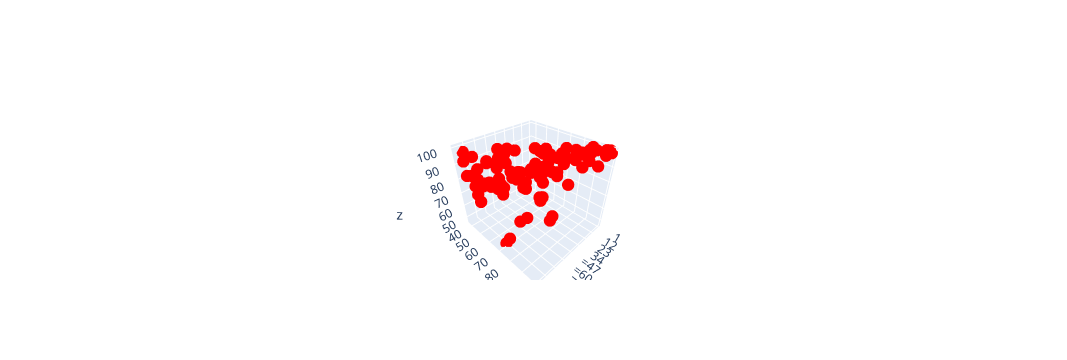

In [33]:
trace1 = go.Scatter3d(
                    x = df2016.world_rank,
                    y = df2016.research,
                    z = df2016.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",))

data = [trace1]
layout = go.Layout(
                )
fig = go.Figure(data = data, layout = layout)
iplot(fig)